In [31]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
n_samples = 100
noise_std = 1
test_size = 0.3

X = np.linspace(0, 2*np.pi, n_samples).reshape((-1, 1))
y = np.sin(X) + np.random.normal(scale=noise_std, size=n_samples).reshape((-1, 1))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

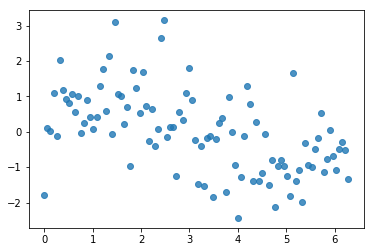

In [46]:
sns.regplot(X.flatten(), y.flatten(), fit_reg=False)

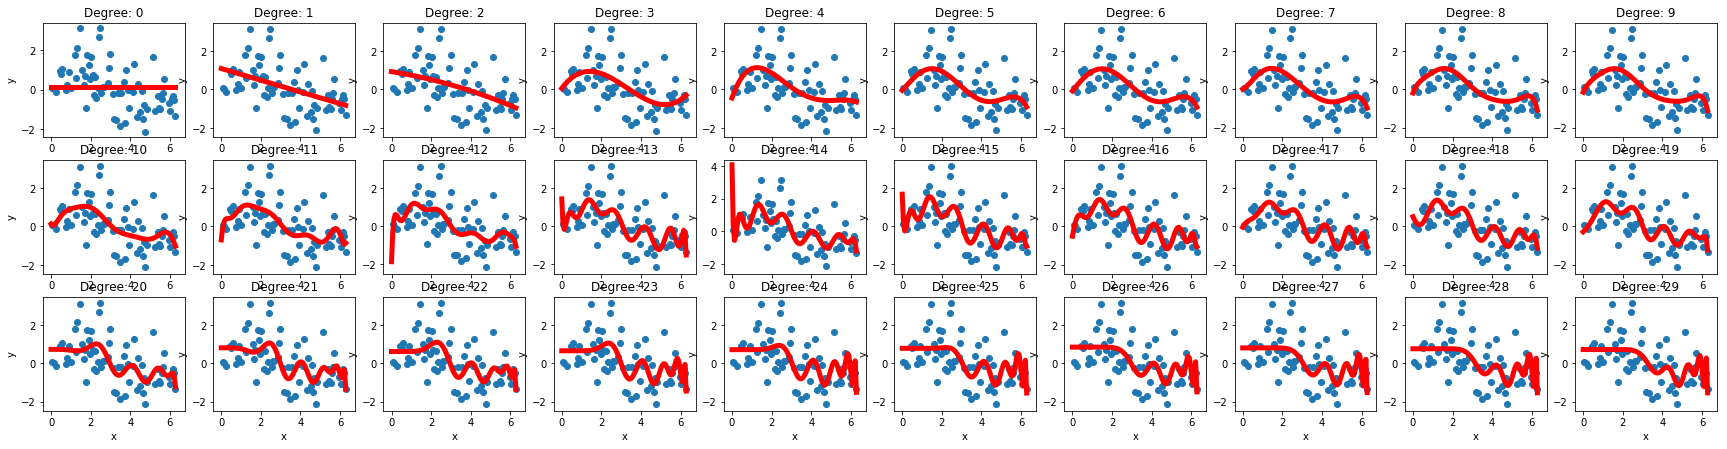

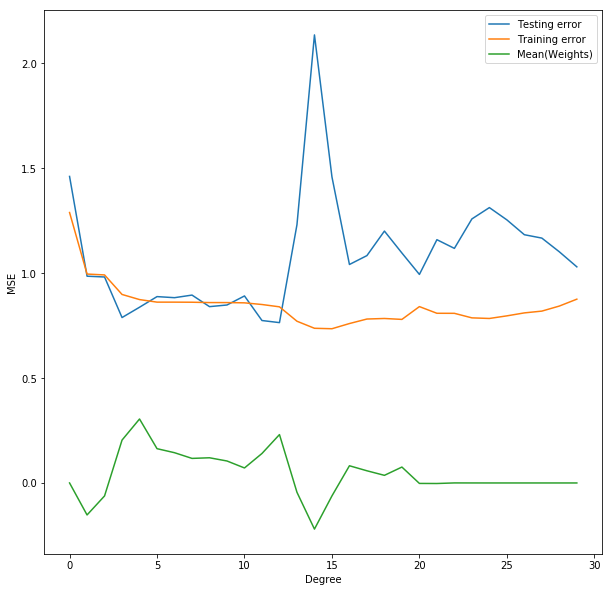

In [91]:
n_degrees = 30

degrees = np.arange(n_degrees)
errors = np.zeros(n_degrees)
errors_train = np.zeros(n_degrees)
weights = []

x_min = np.min(X)
x_max = np.max(X)

plt.figure(figsize=(30, 50))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    model.fit(X_train, y_train)
    weights.append(model.get_params()['linearregression'].coef_)
    
    y_pred = model.predict(X_test)
    error = mean_squared_error(y_true=y_test, y_pred=y_pred)
    errors[i] = error
    
    y_train_pred = model.predict(X_train)
    error_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
    errors_train[i] = error_train
    
    plt.subplot(np.ceil(2*degrees.shape[0]/3), np.ceil(degrees.shape[0]/3), i + 1)   
    x_plot = np.linspace(x_min, x_max, 100).reshape((-1, 1))
    y_plot = model.predict(x_plot)
    plt.plot(x_plot.flatten(), y_plot.flatten(), linewidth=5, color="r")
    plt.scatter(X_train.flatten(), y_train.flatten())
    plt.title("Degree: {}".format(degree))
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.figure(figsize=(10, 10))
plt.plot(degrees, errors, label="Testing error")
plt.plot(degrees, errors_train, label="Training error")
plt.plot(degrees, list(map(lambda x: np.mean(x), weights)), label="Mean(Weights)")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()
plt.show()
